# Introduction

![Image Description](data_schema.png)

In [2]:
# Import library
import seaborn as sns # for visualisation
import matplotlib.pyplot as plt # for visualisation
import pandas as pd # for importing and manipulating data
# from datetime import date
import missingno as msno # for checking missing data
import os # for working with local directory
import shapefile
from mpl_toolkits.basemap import Basemap
import geopandas as gpd

In [3]:
# get the current directory of computer
os.getcwd()

'c:\\Users\\Clone\\Brazillian Ecommerce Case Study\\Brazillian-Ecommerce-Case-Study'

In [4]:
# direct the directory to the folder containing dataframe
os.chdir('C:\\Users\\Clone\\OneDrive - v35p0\\Desktop\\Desktop\\Office\\Brazillian Ecommerce')

## I. Data Inspection

### I.I Inspecting Customer and Geolocation datasets

In [5]:
# Import customer dataset
df_cstmr = pd.read_csv('olist_customers_dataset.csv')
df_cstmr.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [6]:
df_cstmr.shape

(99441, 5)

df_customer has a total of 99,441 rows and 5 columns.

In [7]:
# Checking info() of df_cstmr
df_cstmr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


df_cstmr is quite clean without null value. All customers' information has not missed.

In [8]:
df_cstmr.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [9]:
df_cstmr.nunique()

customer_id                 99441
customer_unique_id          96096
customer_zip_code_prefix    14994
customer_city                4119
customer_state                 27
dtype: int64

There are difference between customer_id and customer_unique_id, suggesting that some customers might have at least two ids. 

In [10]:
# Import geolocation dataset
df_geo = pd.read_csv('olist_geolocation_dataset.csv')
df_geo.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [11]:
df_geo.shape

(1000163, 5)

In [12]:
# Checking info() of df_geo
df_geo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [13]:
df_geo.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


In [14]:
df_merged = pd.merge(df_cstmr,
                 df_geo[['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng']],
                 left_on='customer_zip_code_prefix',
                 right_on='geolocation_zip_code_prefix',
                 how='inner')
df_merged.head()
# missing_df = df.isnull().sum()
# for i in range(len(missing_df)):
#     print("Missing rows in {} : {}".format(missing_df.index[i], missing_df.values[i]))

# df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409,-20.509897,-47.397866
1,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409,-20.497396,-47.399241
2,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409,-20.510459,-47.399553
3,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409,-20.480940,-47.394161
4,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409,-20.515413,-47.398194


In [15]:
df_merged.shape

(15083455, 8)

In [16]:
df_order = pd.read_csv('olist_orders_dataset.csv')
df_order.head(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01 00:00:00
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
7,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07 00:00:00
8,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06 00:00:00
9,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-08-10 19:45:24,2017-08-16 17:14:30,2017-08-23 00:00:00


In [17]:
df_payment = pd.read_csv('olist_order_payments_dataset.csv')

In [18]:
# Define a function to capitalize first letter of each word
def capitalise_word(word):
    words = word.split()
    for i, w in enumerate(words):
        if w.lower() not in ('de', 'do', 'da', 'das', 'dos'):
            words[i] = w.title()
    return ' '.join(words)

In [19]:
# Apply function to 
df_merged.customer_city = df_merged.customer_city.apply(capitalise_word)


In [20]:
df_merged.tail(1000)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
15082455,3c84e38052e77f837c05363ad8a2b16b,a4931ede16fa41135066b3c7f054e287,85509,Pato Branco,PR,85509,-26.234159,-52.694272
15082456,3c84e38052e77f837c05363ad8a2b16b,a4931ede16fa41135066b3c7f054e287,85509,Pato Branco,PR,85509,-26.243493,-52.700674
15082457,3c84e38052e77f837c05363ad8a2b16b,a4931ede16fa41135066b3c7f054e287,85509,Pato Branco,PR,85509,-26.244126,-52.705891
15082458,3c84e38052e77f837c05363ad8a2b16b,a4931ede16fa41135066b3c7f054e287,85509,Pato Branco,PR,85509,-26.242618,-52.702674
15082459,3c84e38052e77f837c05363ad8a2b16b,a4931ede16fa41135066b3c7f054e287,85509,Pato Branco,PR,85509,-26.238435,-52.693619
...,...,...,...,...,...,...,...,...
15083450,d9110683c7a282144e9fc97660026a28,5cbfdb85ec130898108b32c50d619c39,74980,Aparecida de Goiania,GO,74980,-16.821866,-49.244027
15083451,d9110683c7a282144e9fc97660026a28,5cbfdb85ec130898108b32c50d619c39,74980,Aparecida de Goiania,GO,74980,-16.821866,-49.244027
15083452,d9110683c7a282144e9fc97660026a28,5cbfdb85ec130898108b32c50d619c39,74980,Aparecida de Goiania,GO,74980,-16.822945,-49.244615
15083453,6fb4f2354f36e554ac80141e9128f528,3cc6f2e1b9199837fabb35ff4bf24884,99043,Passo Fundo,RS,99043,-28.226596,-52.467505


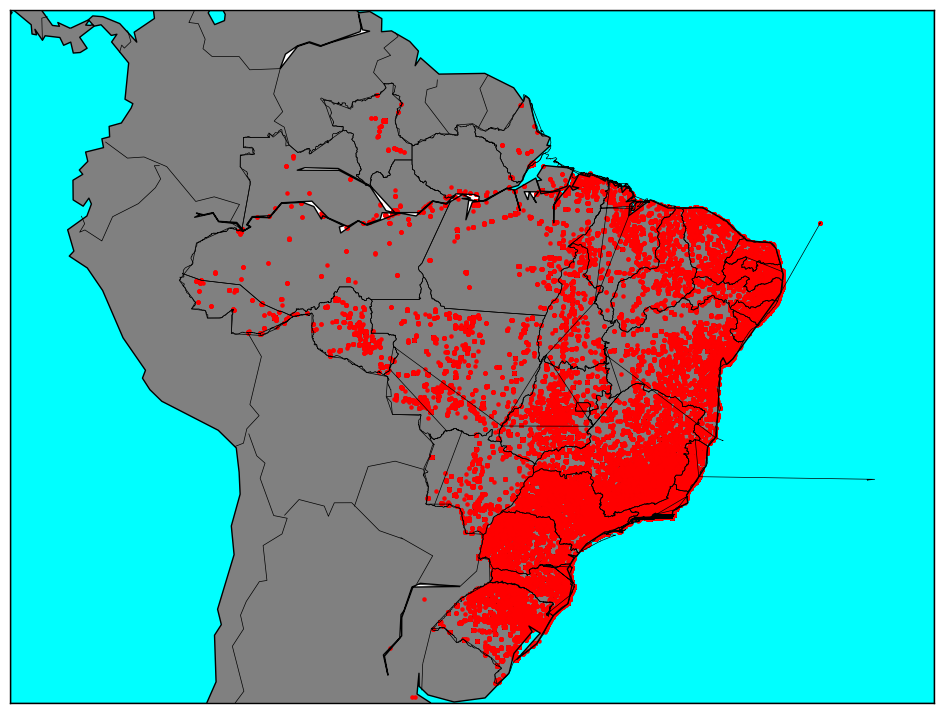

In [27]:
sf = shapefile.Reader("C:\\Users\\Clone\\bra_adm_ibge_2020_shp\\bra_admbnda_adm1_ibge_2020.shp")

latitudes = df_geo['geolocation_lat'].values
longitudes = df_geo['geolocation_lng'].values


# Create a figure and Basemap object
plt.figure(figsize=(14, 9))
m = Basemap(llcrnrlat=-35, llcrnrlon=-85, urcrnrlat=10, urcrnrlon=-25)

# Draw map features
m.drawcoastlines()
m.fillcontinents(color='grey')
m.drawmapboundary(fill_color='aqua')
m.drawcountries()

# Draw Brazil's provinces and region
for shape in sf.shapes():
    points = shape.points
    lon, lat = zip(*points)
    x, y = m(lon, lat)
    m.plot(x, y, linewidth=0.5, color='black')

# Plot the data points
m.scatter(longitudes, latitudes, marker='o', color='red', alpha=1, s=5)

# Show the map
plt.show()